In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("breast_cancer_data.csv")
df = df.set_index('id')
print("Dataset dimensions: " + str(df.shape))
print(df['diagnosis'].value_counts())
df.head()
#drop empty column, dummy target
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df = df.drop('Unnamed: 32', axis=1)

Dataset dimensions: (569, 32)
B    357
M    212
Name: diagnosis, dtype: int64


In [203]:
count nulls
df.isnull().sum()
df.isna().sum()

In [103]:
from sklearn.model_selection import train_test_split
y = df['diagnosis'].values
X = df.drop('diagnosis', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble

kfold = KFold(n_splits=10, random_state=42)

#logistic regression
lrg = LogisticRegression()
start = time.time()
lrg_results = cross_val_score(lrg, X_train, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("Logistic Regression: %f   runtime: %f" % (lrg_results.mean(), end-start))

#svm
svc = SVC()
start = time.time()
svc_results = cross_val_score(svc, X_train, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("Support Vector Machine: %f   runtime: %f" % (svc_results.mean(), end-start))

#naive bayes
gnb = GaussianNB()
start = time.time()
gnb_results = cross_val_score(gnb, X_train, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("Gaussian Naive Bayes: %f   runtime: %f" % (gnb_results.mean(), end-start))

#knn
knc = KNeighborsClassifier()
start = time.time()
knc_results = cross_val_score(knc, X_train, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("K Nearest Neighbors: %f   runtime: %f" % (knc_results.mean(), end-start))

#random forest
rfc = ensemble.RandomForestClassifier()
start = time.time()
rfc_results = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("Random Forest: %f   runtime: %f" % (rfc_results.mean(), end-start))


Logistic Regression: 0.949420   runtime: 0.144365
Support Vector Machine: 0.628309   runtime: 0.186461
Gaussian Naive Bayes: 0.936184   runtime: 0.017611
K Nearest Neighbors: 0.914058   runtime: 0.030289
Random Forest: 0.949420   runtime: 0.227376


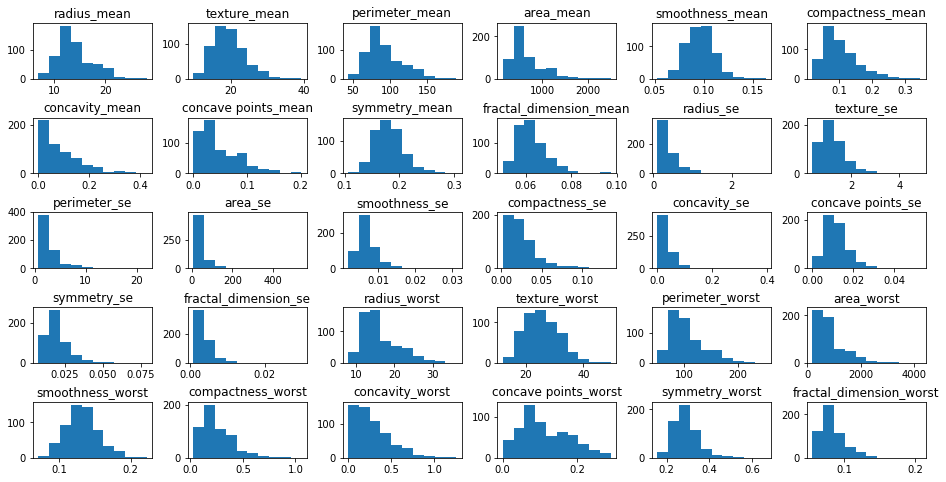

In [105]:
plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.3, hspace=0.7)

for i in range(len(df.columns) - 1):
    plt.subplot(5,6,i+1)
    plt.hist(df.iloc[:,i+1])
    plt.title(str(list(df.columns)[i+1]))

plt.show()

In [106]:
from sklearn.preprocessing import StandardScaler
import time


#FEATURE ENGINEERING
#Scale
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

#upsample malignant observations to reduce bias
m_upsample = df.loc[df['diagnosis'] == 1].sample(n=145, random_state=42)
df = df.append(m_upsample)
print(df['diagnosis'].value_counts())

df['size'] = df[['radius_mean', 'perimeter_mean', 'area_mean', 
                 'radius_se', 'perimeter_se', 'area_se',
                 'radius_worst', 'perimeter_worst', 'area_worst']].mean(axis=1)
                  
df = df.drop(['radius_mean', 'perimeter_mean', 'area_mean',
              'radius_se', 'perimeter_se', 'area_se',
              'radius_worst', 'perimeter_worst', 'area_worst'], axis=1)


#logistic regression
lrg = LogisticRegression()
start = time.time()
lrg_scaled = cross_val_score(lrg, X_train_sc, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("Logistic Regression (scaled): %f   runtime: %f" % (lrg_scaled.mean(), end-start))

#svm
svc = SVC()
start = time.time()
svc_scaled = cross_val_score(svc, X_train_sc, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("Support Vector Machine (scaled): %f   runtime: %f" % (svc_scaled.mean(), end-start))

#naive bayes
gnb = GaussianNB()
start = time.time()
gnb_scaled = cross_val_score(gnb, X_train_sc, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("Gaussian Naive Bayes (scaled): %f   runtime: %f" % (gnb_scaled.mean(), end-start))

#knn
knc = KNeighborsClassifier()
start = time.time()
knc_scaled = cross_val_score(knc, X_train_sc, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("K Nearest Neighbors (scaled): %f   runtime: %f" % (knc_scaled.mean(), end-start))

#random forest
rfc = ensemble.RandomForestClassifier()
start = time.time()
rfc_scaled = cross_val_score(rfc, X_train_sc, y_train, cv=kfold, scoring='accuracy')
end = time.time()
print("Random Forest (scaled): %f   runtime: %f" % (rfc_scaled.mean(), end-start))



1    357
0    357
Name: diagnosis, dtype: int64
Logistic Regression (scaled): 0.971449   runtime: 0.194940
Support Vector Machine (scaled): 0.973671   runtime: 0.055333
Gaussian Naive Bayes (scaled): 0.929614   runtime: 0.023221
K Nearest Neighbors (scaled): 0.964686   runtime: 0.022617
Random Forest (scaled): 0.949324   runtime: 0.203454


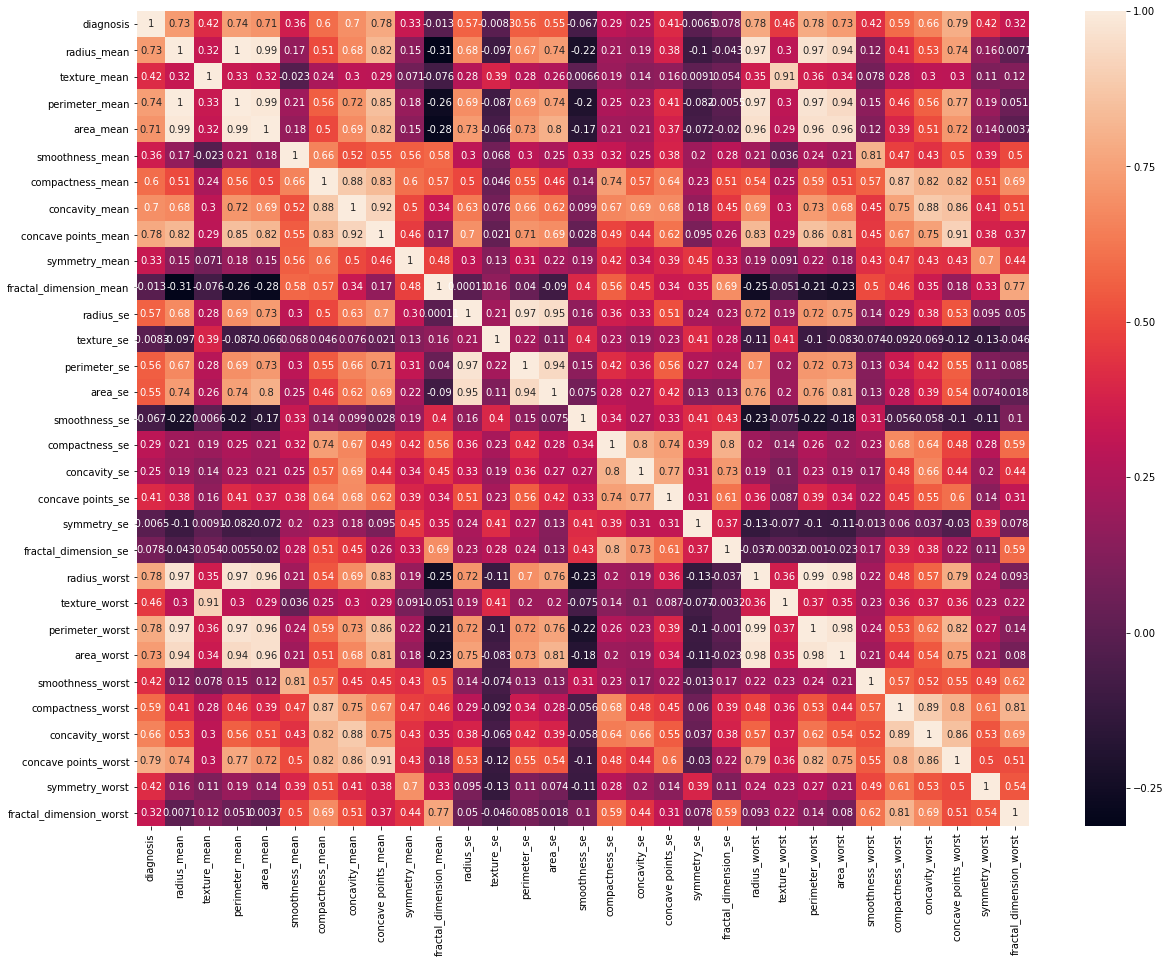

In [111]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

Eigenvector 1: 
[0.21691695 0.21639914 0.10359936 0.2245478  0.21796464 0.13764549
 0.23150388 0.25122179 0.2552664  0.1330126  0.05797189 0.20090409
 0.01547414 0.20563036 0.19798194 0.01123624 0.1619218  0.14578435
 0.1762679  0.03832541 0.09508414 0.22558983 0.10501867 0.23364163
 0.22196962 0.12530106 0.20447639 0.22307483 0.24628844 0.12066328
 0.12672101]
Eigenvalue 1: 13.942274064964014
----------------------------------------
Eigenvector 2: 
[-0.07760994 -0.22654473 -0.05826196 -0.20762951 -0.22322434  0.18876038
  0.15847307  0.06786768 -0.02722028  0.19321967  0.36761956 -0.09715581
  0.09118826 -0.08069084 -0.14355563  0.20531469  0.23886735  0.203226
  0.13704859  0.1860032   0.28433173 -0.21289639 -0.04513536 -0.19259202
 -0.21188718  0.17247591  0.14766283  0.10308807 -0.00243309  0.14206245
  0.27644912]
Eigenvalue 2: 5.736433778007927
----------------------------------------
Eigenvector 3: 
[ 0.10382598 -0.00252701 -0.05475077 -0.00185393 -0.04015101  0.10283457
  0.067

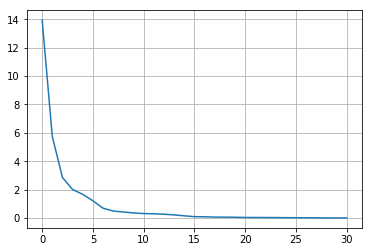

[1.39422741e+01 5.73643378e+00 2.85186154e+00 2.00188139e+00
 1.66199949e+00 1.20963379e+00 6.85924646e-01 4.85709057e-01
 4.17628800e-01 3.51511408e-01 3.05392113e-01 2.91498144e-01
 2.61469947e-01 2.12649275e-01 1.48837762e-01 8.83177777e-02
 8.00007715e-02 5.91392660e-02 5.15525101e-02 4.83008359e-02
 3.07603392e-02 2.95786345e-02 2.73928094e-02 2.43263453e-02
 1.75831161e-02 1.55005796e-02 8.07032705e-03 6.88182652e-03
 1.32868212e-04 7.42984526e-04 1.59126388e-03]
The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05]


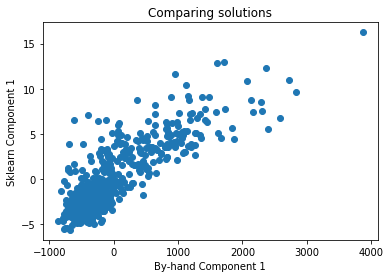

In [110]:
#PCA
#Try PCA
#import librries
from sklearn.decomposition import PCA
Xs = StandardScaler().fit_transform(df)

Xt = Xs.T
Cx = np.cov(Xt)

# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

# print scree plot
plt.plot(eig_val_cov)
plt.grid()
plt.show()

print(eig_val_cov)

sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [107]:
#SVC GridSearchCV
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
Xs = StandardScaler().fit_transform(df)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
svc_param_grid = dict(C=c_values, kernel=kernel_values)

kfold = KFold(n_splits=10, random_state=42)
svc_grid = GridSearchCV(estimator=svc, param_grid=svc_param_grid, scoring='accuracy', cv=kfold)
svc_grid_result = svc_grid.fit(X_train_sc, y_train)
print("Best: %f using %s" % (svc_grid_result.best_score_, svc_grid_result.best_params_))
means = svc_grid_result.cv_results_['mean_test_score']
stds = svc_grid_result.cv_results_['std_test_score']
params = svc_grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978022 using {'C': 0.1, 'kernel': 'linear'}
0.978022 (0.019714) with: {'C': 0.1, 'kernel': 'linear'}
0.843956 (0.046713) with: {'C': 0.1, 'kernel': 'poly'}
0.940659 (0.022087) with: {'C': 0.1, 'kernel': 'rbf'}
0.947253 (0.028360) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.971429 (0.017185) with: {'C': 0.3, 'kernel': 'linear'}
0.887912 (0.021189) with: {'C': 0.3, 'kernel': 'poly'}
0.956044 (0.027977) with: {'C': 0.3, 'kernel': 'rbf'}
0.969231 (0.024672) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.975824 (0.015405) with: {'C': 0.5, 'kernel': 'linear'}
0.896703 (0.024477) with: {'C': 0.5, 'kernel': 'poly'}
0.967033 (0.017829) with: {'C': 0.5, 'kernel': 'rbf'}
0.960440 (0.034019) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.971429 (0.019690) with: {'C': 0.7, 'kernel': 'linear'}
0.901099 (0.026679) with: {'C': 0.7, 'kernel': 'poly'}
0.969231 (0.014620) with: {'C': 0.7, 'kernel': 'rbf'}
0.956044 (0.029779) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.973626 (0.016418) with: {'C': 0.9, 'kernel': 'line

In [108]:
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
best_svc = SVC(C = 1, kernel = 'linear')
best_svc.fit(X_train_sc, y_train)

predictions = best_svc.predict(X_test_sc)
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.973684
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        71
          1       1.00      0.93      0.96        43

avg / total       0.97      0.97      0.97       114



In [109]:
#KNN GridSearchCV

k_range = list(range(1, 31))
weights = ['uniform', 'distance']
knc_param_grid = dict(n_neighbors=k_range, weights=weights)
knc_grid = GridSearchCV(knc, knc_param_grid, cv=kfold, scoring='accuracy')
knc_grid.fit(X_train_sc, y_train)
knc_grid_mean_scores = [result.mean_validation_score for result in knc_grid.grid_scores_]

# Single best score achieved across all params (k)
print(knc_grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(knc_grid.best_params_)

0.967032967032967
{'n_neighbors': 6, 'weights': 'distance'}


/Users/robgleich/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [9]:
#Tune Random Forest

n_estimators = [50, 80, 100, 300, 500]
max_depth = [2, 3, 5, 8, 12]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4] 

rfc_param_grid = dict(n_estimators = n_estimators, 
              max_depth = max_depth,  
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

rfc_grid = GridSearchCV(rfc, rfc_param_grid, cv=kfold, scoring='accuracy')

start = time.time()
rfc_grid.fit(X_train_sc, y_train)
end = time.time()
print("Time: " + str((end - start) / 60) + " minutes")
rfc_grid_mean_scores = [result.mean_validation_score for result in rfc_grid.grid_scores_]

# Single best score achieved across all params
print("best score: " + str(rfc_grid.best_score_))

# Dictionary containing the parameters used to generate that score
print("best parameters: " + str(rfc_grid.best_params_))


Time: 14.833652301629384 minutes
best score: 0.967032967032967
best parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


/Users/robgleich/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


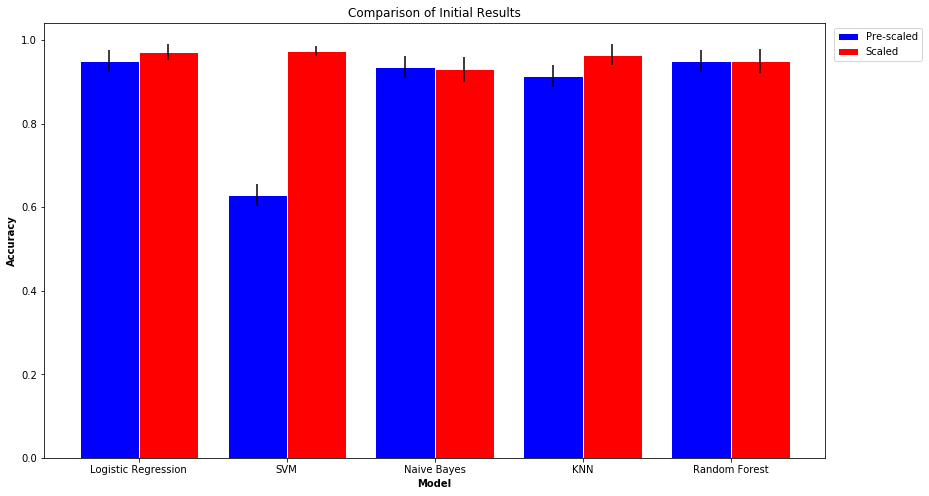

In [132]:
#compare initial results
plt.figure(figsize=(14, 8))
pre_results = [lrg_results.mean(), svc_results.mean(), gnb_results.mean(), knc_results.mean(), rfc_results.mean()]
pre_errors = [lrg_results.std(), lrg_results.std(), lrg_results.std(), lrg_results.std(), lrg_results.std()]
post_results = [lrg_scaled.mean(), svc_scaled.mean(), gnb_scaled.mean(), knc_scaled.mean(), rfc_scaled.mean()]
post_errors = [lrg_scaled.std(), svc_scaled.std(), gnb_scaled.std(), knc_scaled.std(), rfc_scaled.std()]

x_labels = ['Logistic Regression', 'SVM', 'Naive Bayes', 'KNN', 'Random Forest']
barWidth = 0.4

x = np.arange(len(x_labels))

r1 = np.arange(len(pre_results))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, pre_results, color='blue', width=barWidth, edgecolor='white', yerr=pre_errors, label='Pre-scaled')
plt.bar(r2, post_results, color='red', width=barWidth, edgecolor='white', yerr=post_errors, label='Scaled')

 
# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

plt.xticks([r + barWidth / 2 for r in range(len(pre_results))], x_labels)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1.13,1))
plt.title("Comparison of Initial Results")
plt.show()


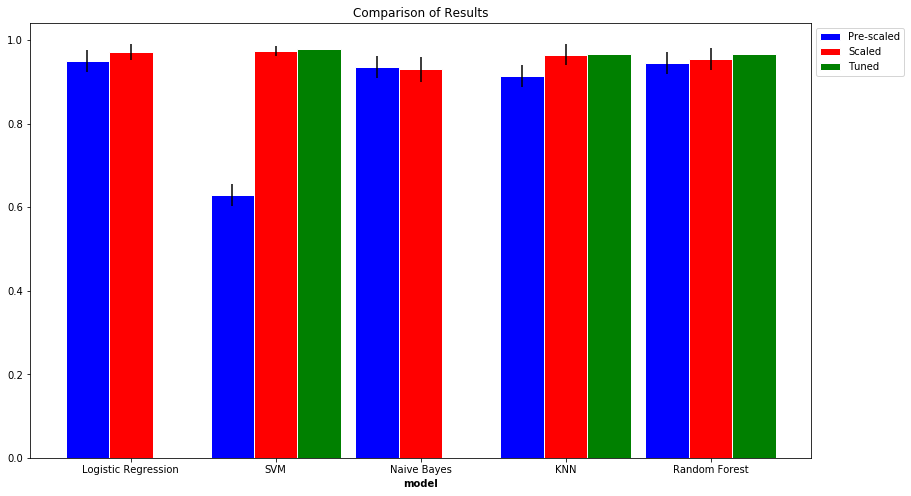

SVC best score: 0.978021978021978
KNN best score: 0.967032967032967
Random Forest best score: 0.967032967032967


In [96]:
#compare final tuned results

plt.figure(figsize=(14, 8))
pre_results = [lrg_results.mean(), svc_results.mean(), gnb_results.mean(), knc_results.mean(), rfc_results.mean()]
pre_errors = [lrg_results.std(), lrg_results.std(), lrg_results.std(), lrg_results.std(), lrg_results.std()]
post_results = [lrg_scaled.mean(), svc_scaled.mean(), gnb_scaled.mean(), knc_scaled.mean(), rfc_scaled.mean()]
post_errors = [lrg_scaled.std(), svc_scaled.std(), gnb_scaled.std(), knc_scaled.std(), rfc_scaled.std()]
tuned_results = [0, svc_grid_result.best_score_, 0, knc_grid.best_score_, rfc_grid.best_score_]

x_labels = ['Logistic Regression', 'SVM', 'Naive Bayes', 'KNN', 'Random Forest']
barWidth = 0.3

x = np.arange(len(x_labels))

r1 = np.arange(len(pre_results))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

 
# Make the plot
plt.bar(r1, pre_results, color='blue', width=barWidth, edgecolor='white', yerr=pre_errors, label='Pre-scaled')
plt.bar(r2, post_results, color='red', width=barWidth, edgecolor='white', yerr=post_errors, label='Scaled')
plt.bar(r3, tuned_results, color='green', width=barWidth, edgecolor='white', label='Tuned')
 
# Add xticks on the middle of the group bars
plt.xlabel('model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(pre_results))], x_labels)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1,1))
plt.title("Comparison of Results")
plt.show()

print("SVC best score: " + str(svc_grid_result.best_score_))
print("KNN best score: " + str(knc_grid.best_score_))
print("Random Forest best score: " + str(rfc_grid.best_score_))

In [116]:
#results of optimized model

from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
best_svc = SVC(C = 1, kernel = 'linear')
best_svc.fit(X_train_sc, y_train)

predictions = best_svc.predict(X_test_sc)
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.973684
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        71
          1       1.00      0.93      0.96        43

avg / total       0.97      0.97      0.97       114



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

svc.fit(X_train_sc, y_train)
y_pred = svc.predict(X_test)
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion_matrix = pd.DataFrame(cm, index=['is_malignant', 'is_benign'], 
                                columns=['predicted_malignant', 'predicted_benign'])


In [124]:
#SVC GridSearchCV, optimizing for recall
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
Xs = StandardScaler().fit_transform(df)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
svc_param_grid = dict(C=c_values, kernel=kernel_values)

kfold = KFold(n_splits=10, random_state=42)
svc_grid = GridSearchCV(estimator=svc, param_grid=svc_param_grid, scoring='recall', cv=kfold)
svc_grid_result = svc_grid.fit(X_train_sc, y_train)
print("Best: %f using %s" % (svc_grid_result.best_score_, svc_grid_result.best_params_))
means = svc_grid_result.cv_results_['mean_test_score']
stds = svc_grid_result.cv_results_['std_test_score']
params = svc_grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.970514 using {'C': 0.5, 'kernel': 'linear'}
0.965170 (0.044910) with: {'C': 0.1, 'kernel': 'linear'}
0.569268 (0.116497) with: {'C': 0.1, 'kernel': 'poly'}
0.874119 (0.055050) with: {'C': 0.1, 'kernel': 'rbf'}
0.878086 (0.062543) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.965170 (0.044910) with: {'C': 0.3, 'kernel': 'linear'}
0.690606 (0.059475) with: {'C': 0.3, 'kernel': 'poly'}
0.905686 (0.074474) with: {'C': 0.3, 'kernel': 'rbf'}
0.926423 (0.058787) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.970514 (0.037468) with: {'C': 0.5, 'kernel': 'linear'}
0.713773 (0.076336) with: {'C': 0.5, 'kernel': 'poly'}
0.939544 (0.054880) with: {'C': 0.5, 'kernel': 'rbf'}
0.917653 (0.068255) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.965700 (0.047360) with: {'C': 0.7, 'kernel': 'linear'}
0.723346 (0.088964) with: {'C': 0.7, 'kernel': 'poly'}
0.943500 (0.051801) with: {'C': 0.7, 'kernel': 'rbf'}
0.912586 (0.071870) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.970514 (0.037468) with: {'C': 0.9, 'kernel': 'line

In [125]:
#results for recall-optimized model
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
best_svc = SVC(C = 0.5, kernel = 'linear')
best_svc.fit(X_train_sc, y_train)

predictions = best_svc.predict(X_test_sc)
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.982456
             precision    recall  f1-score   support

          0       0.97      1.00      0.99        71
          1       1.00      0.95      0.98        43

avg / total       0.98      0.98      0.98       114

